In [1]:
import numpy as np
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [2]:
df=pd.read_csv('Stationarity_3.csv')

In [3]:
df

,Date,Original,Value
0,2012-12-31,37.066559,0.000000
1,2013-01-01,37.417144,0.350585
2,2013-01-02,37.228052,-0.189092
3,2013-01-03,37.167616,-0.060436
4,2013-01-04,38.210898,1.043283
...,...,...,...
3648,2022-12-27,77.025000,1.281252
3649,2022-12-28,77.393750,0.368750
3650,2022-12-29,78.431249,1.037499
3651,2022-12-30,79.299999,0.868751


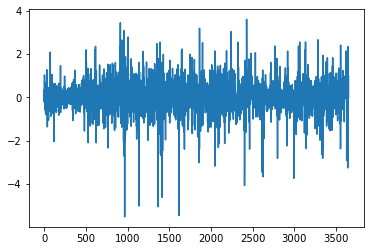

In [4]:
plt.plot(df['Value'])
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df['value']=scaler.fit_transform(df[['Value']])

In [6]:
from numpy import array

In [7]:
# let us build this function

def split_sequence(sequence,steps):
    x,y=list(),list()
    for start in range(len(sequence)):
        end_index=start+steps
        if end_index > len(sequence)-1:
            break;
        sequence_x,sequence_y=sequence[start:end_index],sequence[end_index]
        x.append(sequence_x)
        y.append(sequence_y)
    return array(x),array(y)

In [8]:
# let us test our function is working or not

s=[100,120,110,140,130,150,160,190,170,180]
steps=3 #let us take 3 lagged values for this 
x,y=split_sequence(s,steps)

print('______________________________________________')
print('original sequence :')
print(s)
print('______________________________________________')
print('lagged values :')
print(x)
print('______________________________________________')
print('observed values :')
print(y)

______________________________________________
original sequence :
[100, 120, 110, 140, 130, 150, 160, 190, 170, 180]
______________________________________________
lagged values :
[[100 120 110]
 [120 110 140]
 [110 140 130]
 [140 130 150]
 [130 150 160]
 [150 160 190]
 [160 190 170]]
______________________________________________
observed values :
[140 130 150 160 190 170 180]


In [9]:
# now do the same for our original data & 6 day lag

d=df['value'].tolist()

steps=6 
x,y=split_sequence(d,steps)


In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [11]:
model=RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [12]:
model.fit(x,y)

RandomForestRegressor(n_estimators=1000, random_state=42)

In [13]:
test_data_x= x[-300:]
test_data_y= y[-300:]

In [14]:
test_data_pred=model.predict(test_data_x)

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error

mean = np.mean(test_data_pred)
abs_deviations = np.abs(test_data_pred-mean)
mad = np.mean(abs_deviations)
print("MAD:", mad)

mse = mean_squared_error(test_data_y,test_data_pred)
rmse = np.sqrt(mse)
print("RMSE :",rmse)


def mean_absolute_percentage_error(y_actual, y_predicted):
    return np.mean(np.abs((y_actual-y_predicted)/y_actual))*100

mape = mean_absolute_percentage_error(np.array(test_data_y), np.array(test_data_pred))
print("MAPE:", mape)


def mean_bias_error(y_actual, y_predicted):
    return mean_squared_error(y_actual,y_predicted)

mbe = mean_bias_error(np.array(test_data_y), np.array(test_data_pred))
print("MSE:", mbe)

MAD: 0.03481592208613023
RMSE : 0.03037313615530986
MAPE: 3.7065850300173855
MSE: 0.0009225273999089911


In [16]:
from sklearn.metrics import r2_score

r2_score(test_data_y,test_data_pred)

0.8562142894819104

In [17]:
t_i1=array([0.304381189024771,0.301713307515281,0.301576848232958,0.290095456717525,0.295064792801103,0.289618173982269])
t_i1=t_i1.reshape(1,-1)
y_p1=model.predict(t_i1)
print(y_p1)

[0.69053031]


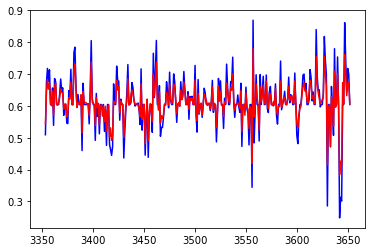

In [18]:
plt.plot(df.tail(300).index, test_data_y, color='blue')
plt.plot(df.tail(300).index, test_data_pred, color='red')
plt.show()

In [19]:
#function to increase date by 1

from datetime import datetime, timedelta

def increase(date_string):
    date_obj = datetime.strptime(date_string, "%Y-%m-%d")
    new_date_obj = date_obj + timedelta(days=1)
    formatted_date = datetime.strftime(new_date_obj, "%Y-%m-%d")
    return formatted_date 

start_date='2022-12-31'
increase(start_date)

'2023-01-01'

In [20]:
# forecasting 50 days future data

data=df['value'].tolist()
forecasted_df=pd.DataFrame(columns=['date','value'])
start_date='2022-12-31'

for i in range(50):
    new_date=increase(start_date)
    forecast_input=array(data[-6:])
    x_forecast=forecast_input.reshape(1,-1)
    forecasted_y=model.predict(x_forecast).item()
    #print(np.array(forecasted_y))
    #x=np.concatenate((x,np.array(x_forecast)))
    #y=np.concatenate((y,np.array([forecasted_y])))
    #model.fit(x,y,epochs=5,verbose=0)
    forecasted_df.at[i,'date']=new_date
    forecasted_df.at[i,'value']=forecasted_y
    data.append(forecasted_y)
    start_date=new_date

In [21]:
forecasted_df

,date,value
0,2023-01-01,0.583725
1,2023-01-02,0.631971
2,2023-01-03,0.607507
3,2023-01-04,0.589515
4,2023-01-05,0.603586
5,2023-01-06,0.59409
6,2023-01-07,0.601425
7,2023-01-08,0.599879
8,2023-01-09,0.620041
9,2023-01-10,0.608712


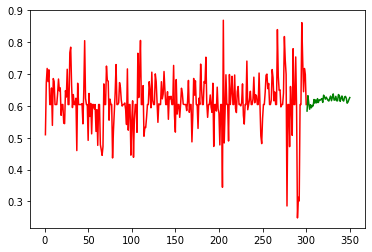

In [22]:
index_old=np.arange(1,301)
index_new=np.arange(301,351)

plt.plot(index_old, test_data_y, color='red')
plt.plot(index_new,forecasted_df['value'], color='green')

In [23]:
forcasted_dif=scaler.inverse_transform(np.array(forecasted_df['value']).reshape(-1,1))

In [24]:
dif_list=np.array(forcasted_dif).flatten().tolist()

dif_list

[-0.18798622987500763,
 0.2539378523749995,
 0.029854832749999144,
 -0.13495158375000094,
 -0.006062262187506891,
 -0.09304601787500484,
 -0.025860605250003124,
 -0.04001321375000214,
 0.14465995987498795,
 0.04089107487498976,
 0.13363315093749265,
 0.04768662987498268,
 0.17004182075000154,
 0.058918736812494606,
 0.13728299618750323,
 0.12310031756250264,
 0.14822672243750162,
 0.17058200031250265,
 0.06090548306250189,
 0.26912246693749087,
 0.21828890800001216,
 0.15458349031249177,
 0.2125057912500032,
 0.1656815195000157,
 0.12117083756250241,
 0.10013198812499759,
 0.18034042425000502,
 0.2422799896250042,
 0.10953269231250125,
 0.20362651150000902,
 0.30583215037501776,
 0.1275168758750026,
 0.12893162937500166,
 0.23547491875000073,
 0.10841100912499671,
 0.10670352193750812,
 0.2870423564374941,
 0.2571710928125071,
 0.09088531262499858,
 0.18261107074999855,
 0.24555353525000104,
 0.12304500493749591,
 0.09924718181249746,
 0.2156633283124999,
 0.23452532243750376,
 0.18068

In [25]:
last_value=df.tail(1)['Original'].iloc[0]

last_value

#print(last_value+dif_list[1])

79.299999375

In [26]:
forecasted_og=[]

for i in range(len(dif_list)):
    n=last_value+dif_list[i]
    forecasted_og.append(n)
    last_value=n
    
forecasted_df['Retrive']=forecasted_og

In [27]:
forecasted_df

,date,value,Retrive
0,2023-01-01,0.583725,79.112013
1,2023-01-02,0.631971,79.365951
2,2023-01-03,0.607507,79.395806
3,2023-01-04,0.589515,79.260854
4,2023-01-05,0.603586,79.254792
5,2023-01-06,0.59409,79.161746
6,2023-01-07,0.601425,79.135885
7,2023-01-08,0.599879,79.095872
8,2023-01-09,0.620041,79.240532
9,2023-01-10,0.608712,79.281423


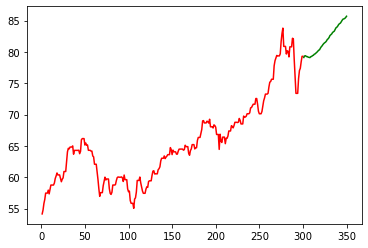

In [28]:
index_old=np.arange(1,301)
index_new=np.arange(301,351)

last_300 = df['Original'][-300:].tolist()

plt.plot(index_old, last_300, color='red')
plt.plot(index_new,forecasted_df['Retrive'], color='green')